# Deep Q-Network (DQN) Reinforcement Learning on the `Taxi-V3 Gymnasium by OpenAI`  

## 1. Environment Setup
Before we start, we need to import all of the necessary libraries.

In [ ]:
# Import Libraries
import gymnasium as gym
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import seaborn as sns
import torch
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
# Import Local Dependencies
from algorithms.DQN import DQNAgent
from utils import DQNTrainer, Tester

Next, we setup our `matplotlib` and `GPU utilization`

In [ ]:
# set up matplotlib
is_ipython = 'inline' in matplotlib.get_backend()
if is_ipython:
    from IPython import display

plt.ion()

# if GPU is to be used
device = torch.device(
    "cuda" if torch.cuda.is_available() else
    "mps" if torch.backends.mps.is_available() else
    "cpu"
)

## 2. Training Phase

### A. Initialize the hyperparameters and instances

In [ ]:
# Base Hyperparameters
MEMORY_SIZE = 10000 # @param {type:"slider", min:1000, max:50000, step:1000}
BATCH_SIZE = 128 # @param {type:"slider", min:32, max:512, step:2}
NUM_EPISODES = 10000 # @param {type:"slider", min:1000, max:10000, step:1000}
MAX_STEPS_PER_EPISODE = 1000 # @param {type:"slider", min:1000, max:10000, step:1000}
NUM_STEPS_FOR_UPDATE = 5 # @param {type:"slider", min:1, max:10, step:1}

# Exploration Hyperparameters
GAMMA = 0.95 # @param {type:"slider", min:0.5, max:1, step:0.05}
ALPHA = 0.001 # @param {type:"number"}
TAU = 0.005 # @param {type:"number"}
EPS_INITIAL = 1.0 # @param {type:"number"}
EPS_MINIMUM = 0.01 # @param {type:"number"}
EPS_DECAY_RATE = 2500 # @param {type:"number"}

# Optimizer
OPTIMIZER = optim.Adam # @param ["optim.Adam", "optim.AdamW", "optim.RMSprop", "optim.SGD"] {type:"raw"}
LOSS = F.mse_loss # @param ["F.mse_loss", "F.huber_loss", "F.smooth_l1_loss"] {type:"raw"}

### B. Setup Instances

In [ ]:
# Environment
taxi_env = gym.make("Taxi-v3", max_episode_steps=MAX_STEPS_PER_EPISODE)
taxi_env.reset()

# Agent
agent = DQNAgent(action_space=taxi_env.action_space, observation_space=taxi_env.observation_space,memory_size=MEMORY_SIZE,
                 gamma=GAMMA, alpha=ALPHA, tau=TAU,
                 eps0=EPS_INITIAL, eps_min=EPS_MINIMUM, eps_decay=EPS_DECAY_RATE,
                 optimizer=OPTIMIZER, loss=LOSS,device=device
                 )

# Trainer
trainer = DQNTrainer(env=taxi_env, agent=agent)

Initializing Q-Network... 500 6


### C. Run Training, and save results

In [ ]:
# Train the Agent
training_results = trainer.train(num_episodes=NUM_EPISODES, batch_size=BATCH_SIZE, num_steps_per_update=NUM_STEPS_FOR_UPDATE)
# Save the model
agent.save_model("./weights/taxi_model_last.pt")

In [ ]:
def plot_results(data, column, dtype=torch.float32):
    plt.figure(1)
    plt.title(f'Training Result ({column} progression over {len(data[column])} Episodes)')
    plt.xlabel('Episode')
    y_series = torch.tensor(data[column])
    plt.ylabel(column)
    means = y_series.unfold(0, 100, 1).mean(1, dtype=dtype).view(-1).to("cpu")
    plt.plot(means.numpy())
    plt.show()

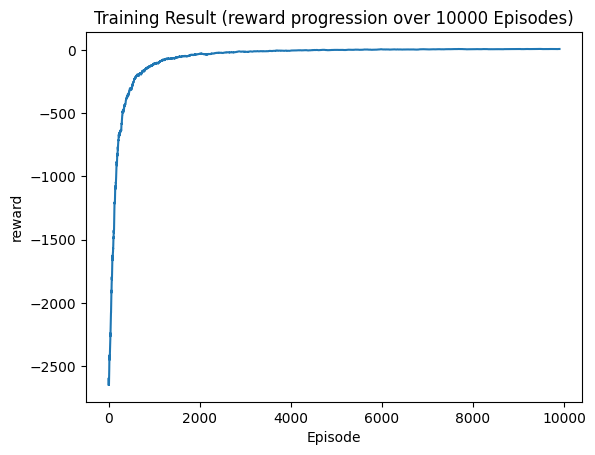

In [ ]:
plot_results(training_results, column="reward")

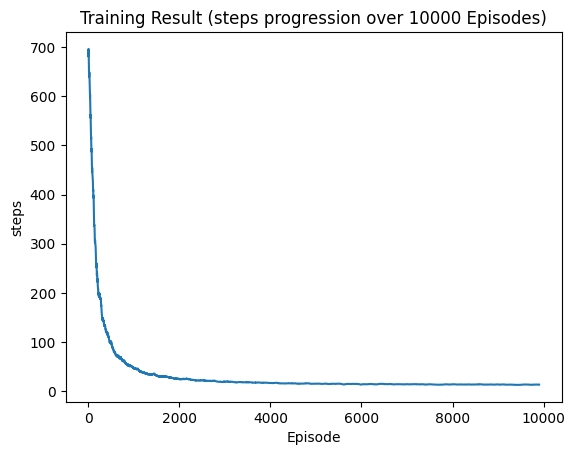

In [ ]:
plot_results(training_results, column="steps")

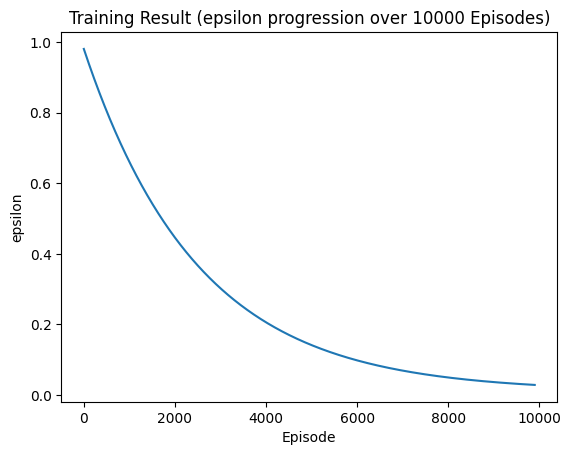

In [ ]:
plot_results(training_results, column="epsilon")

## 3. Testing Phase

### Test on the agent at episode 0

In [ ]:
# Test environment
taxi_env = gym.make("Taxi-v3")
taxi_env.reset()

# Declare agent
agent = DQNAgent(action_space=taxi_env.action_space, observation_space=taxi_env.observation_space,memory_size=MEMORY_SIZE,
                 gamma=GAMMA, alpha=ALPHA, tau=TAU,
                 eps0=EPS_INITIAL, eps_min=EPS_MINIMUM, eps_decay=EPS_DECAY_RATE,
                 optimizer=OPTIMIZER, loss=LOSS,device=device
                 )
# Agent Load Model
agent_path = "taxi_model_0.pt"
agent.load_model(agent_path)
agent.eval()
# Tester
tester = Tester(taxi_env, agent)

# Simulate
tester.simulation(episodes=400)

Initializing Q-Network... 500 6
Actions taken: [move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move south, move

<Figure size 640x480 with 0 Axes>

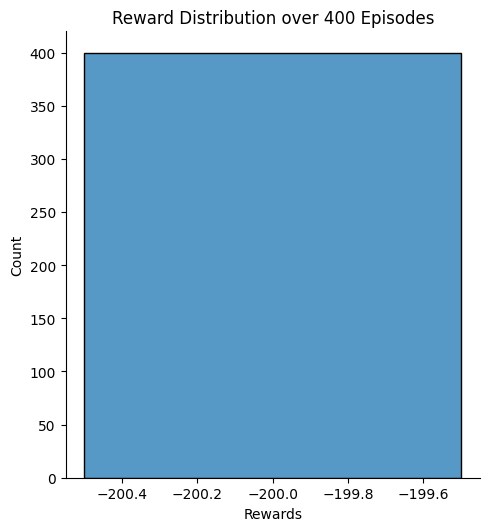

In [ ]:
tester.plot_reward_dist()

### Test on the agent at episode 500

In [ ]:
# Test environment
taxi_env = gym.make("Taxi-v3")
taxi_env.reset()

# Declare agent
agent = DQNAgent(action_space=taxi_env.action_space, observation_space=taxi_env.observation_space,memory_size=MEMORY_SIZE,
                 gamma=GAMMA, alpha=ALPHA, tau=TAU,
                 eps0=EPS_INITIAL, eps_min=EPS_MINIMUM, eps_decay=EPS_DECAY_RATE,
                 optimizer=OPTIMIZER, loss=LOSS,device=device
                 )
# Agent Load Model
agent_path = "taxi_model_500.pt"
agent.load_model(agent_path)
agent.eval()
# Tester
tester = Tester(taxi_env, agent)

# Simulate
tester.simulation(episodes=400)

Initializing Q-Network... 500 6
Actions taken: [move south, move east, move east, move south, move south, pickup passenger, move north, move east, move north, move north, move north, drop off passenger, ]
Episode: 1/400, Steps: 12, Reward: 9
Actions taken: [move south, move west, move west, move west, move west, move north, move north, pickup passenger, move south, move east, move south, move east, move north, move east, move east, move north, drop off passenger, ]
Episode: 2/400, Steps: 17, Reward: 4
Actions taken: [move south, move west, move west, move north, move north, pickup passenger, move south, move south, move south, move south, drop off passenger, ]
Episode: 3/400, Steps: 11, Reward: 10
Actions taken: [move east, move north, move east, move south, move south, pickup passenger, move north, move north, move west, move west, move west, move south, move south, drop off passenger, ]
Episode: 4/400, Steps: 14, Reward: 7
Actions taken: [move south, move east, move south, move east,

<Figure size 640x480 with 0 Axes>

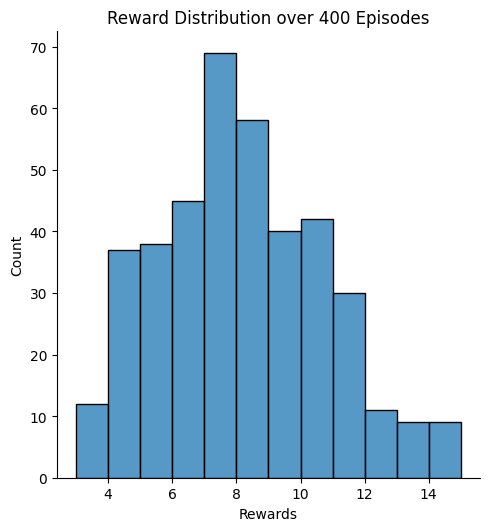

In [ ]:
tester.plot_reward_dist()

### Test on the agent at episode 2000

In [ ]:
# Test environment
taxi_env = gym.make("Taxi-v3")
taxi_env.reset()

# Declare agent
agent = DQNAgent(action_space=taxi_env.action_space, observation_space=taxi_env.observation_space,memory_size=MEMORY_SIZE,
                 gamma=GAMMA, alpha=ALPHA, tau=TAU,
                 eps0=EPS_INITIAL, eps_min=EPS_MINIMUM, eps_decay=EPS_DECAY_RATE,
                 optimizer=OPTIMIZER, loss=LOSS,device=device
                 )
# Agent Load Model
agent_path = "taxi_model_2000.pt"
agent.load_model(agent_path)
agent.eval()
# Tester
tester = Tester(taxi_env, agent)

# Simulate
tester.simulation(episodes=400)

Initializing Q-Network... 500 6
Actions taken: [move east, move south, move east, move east, move south, move south, pickup passenger, move north, move north, move north, move north, move east, drop off passenger, ]
Episode: 1/400, Steps: 13, Reward: 8
Actions taken: [move north, move north, move west, move west, move west, move north, move north, move west, pickup passenger, move south, move south, move east, move east, move north, move east, move north, move east, drop off passenger, ]
Episode: 2/400, Steps: 18, Reward: 3
Actions taken: [move north, move north, move east, move east, move south, move south, pickup passenger, move north, move north, move west, move west, move west, move south, move south, drop off passenger, ]
Episode: 3/400, Steps: 15, Reward: 6
Actions taken: [move east, move north, move north, pickup passenger, move south, move west, move west, move south, move west, move west, move south, move south, drop off passenger, ]
Episode: 4/400, Steps: 13, Reward: 8
Action

<Figure size 640x480 with 0 Axes>

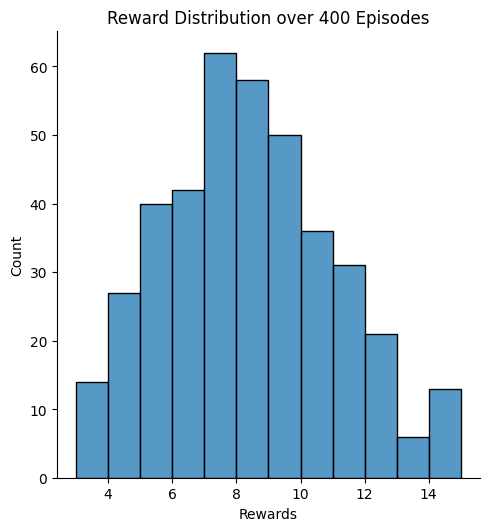

In [ ]:
tester.plot_reward_dist()

### Test on agent after the last episode

In [ ]:
# Test environment
taxi_env = gym.make("Taxi-v3")
taxi_env.reset()

# Declare agent
agent = DQNAgent(action_space=taxi_env.action_space, observation_space=taxi_env.observation_space,memory_size=MEMORY_SIZE,
                 gamma=GAMMA, alpha=ALPHA, tau=TAU,
                 eps0=EPS_INITIAL, eps_min=EPS_MINIMUM, eps_decay=EPS_DECAY_RATE,
                 optimizer=OPTIMIZER, loss=LOSS,device=device
                 )
# Agent Load Model
agent_path = "taxi_model_last.pt"
agent.load_model(agent_path)
agent.eval()
# Tester
tester = Tester(taxi_env, agent)

# Simulate
tester.simulation(episodes=400)

Initializing Q-Network... 500 6
Actions taken: [move north, move north, move north, move north, move west, pickup passenger, move east, move south, move south, move east, move north, move east, move east, move north, drop off passenger, ]
Episode: 1/400, Steps: 15, Reward: 6
Actions taken: [move north, move west, move west, move west, move south, move south, pickup passenger, move north, move north, move north, move north, drop off passenger, ]
Episode: 2/400, Steps: 12, Reward: 9
Actions taken: [move north, move east, move south, move south, pickup passenger, move north, move north, move west, move west, move west, move south, move south, drop off passenger, ]
Episode: 3/400, Steps: 13, Reward: 8
Actions taken: [move north, move east, move east, move east, move south, move south, pickup passenger, move north, move north, move west, move west, move north, move north, move west, drop off passenger, ]
Episode: 4/400, Steps: 15, Reward: 6
Actions taken: [move north, move north, move north

<Figure size 640x480 with 0 Axes>

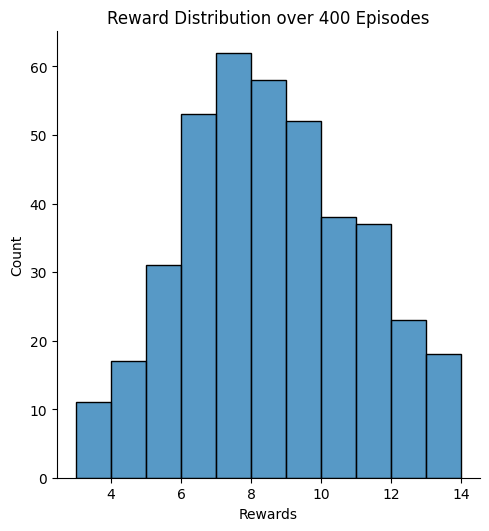

In [ ]:
tester.plot_reward_dist()